In [89]:
import numpy as np

def powers(n,d):
    """ Nonnegative integer tuples of length n which sum to <= d.
    Returns a generator.
    """
    if n == 1:
        for i in range(d+1):
            yield (i,)
    else:
        for i in range(d+1):
            for p in powers(n-1,d):
                t = p + (i,)
                if sum(t) <= d:
                    yield t
                    
                    
def poly(X,d):
    """ Form polynomial "features" for data matrix X.
    Features are monomials of columns of X, with powers <= d.
    
    X is N by n: N examples with n features each.
    
    Returns: Y: N by m matrix, where m is the number of polynomial features, a function of n and d.
    
    >>> import sympy as sp
    >>> x,y,a,b = sp.symbols('x y a b')
    >>> v = np.array([[x,y],[a,b]])
    >>> print poly(v,2)
    
    [[1 x x**2 y x*y y**2]
     [1 a a**2 b a*b b**2]]
     
    >>> print poly(v,3)
    [[1 x x**2 x**3 y x*y x**2*y y**2 x*y**2 y**3]
     [1 a a**2 a**3 b a*b a**2*b b**2 a*b**2 b**3]]
    """
    
    n = X.shape[-1]
    
    result = []
    for p in powers(n,d):
        col = 1
        for i, pi in enumerate(p):
            col *= X[...,i]**pi
        result.append(col)
    return np.vstack(result).T

In [93]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from cvxpy import *

from sklearn.datasets import make_blobs, make_moons

import seaborn as sns
sns.set()
sns.set_style('white')

def myplot(X, y, d, w, margin=True, line_alpha=.5, filename=None,callback=None):
    """
    d is degree of polynomial of X
    w gives weights of polynomial terms
    
    """
    plt.scatter(X[:,0], X[:, 1], c=y, s=75, cmap='cool', alpha=.7)

    if line_alpha > 0.0:
        x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
        y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
        Y, X = np.meshgrid(y, x)

        P = np.zeros_like(X)
        for i, xi in enumerate(x):
            for j, yj in enumerate(y):
                v = np.array([xi, yj])
                v = poly(v,d)
                P[i, j] = v.dot(w)

        levels=[0]
        linestyles=['-']
        if margin:
            levels += [-1, 1]
            linestyles += ['--', '--']

        plt.contour(X, Y, P, colors='k',
                   levels=levels, alpha=line_alpha,
                   linestyles=linestyles)
        
        #plt.contourf(X, Y, np.sign(P), colors=['r', 'b'], alpha=line_alpha)
        plt.contourf(X, Y, np.sign(P), cmap=plt.cm.Paired, alpha=line_alpha)
    
    if callback:
        callback()
    
    if filename:
        plt.savefig(filename, bbox_inches='tight')

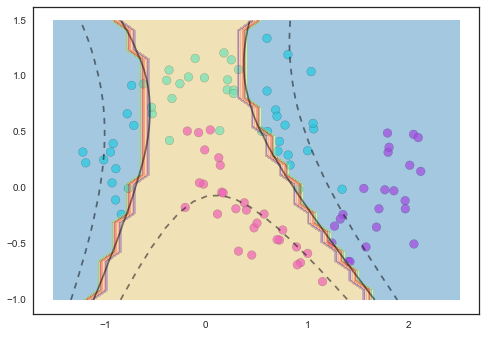

In [94]:
X, y = make_moons(100, noise = .2, random_state=0)
y = 2*y - 1
w = np.random.randn(6)
myplot(X, y, 2, w, margin=True, line_alpha=.5)

In [95]:
poly(X,2).shape

(100, 6)

In [96]:
X2 = poly(X,2)

N,n = X2.shape
N,n

(100, 6)

optimal


<Container object of 3 artists>

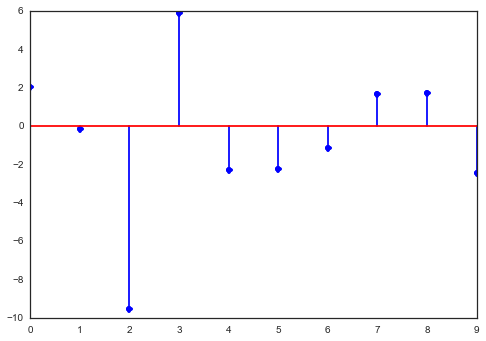

In [97]:
X2 = poly(X,3)

m,n = X2.shape

w = Variable(n)
u = Variable(N)

obj = Minimize(sum_entries(u)+ .2*norm(w[1:],2))
constr = [mul_elemwise(y, X2*w) >= 1 - u, u >= 0]
prob = Problem(obj, constr)
prob.solve()
print prob.status

w = np.array(w.value).flatten()
u = np.array(u.value).flatten()

plt.stem(w)

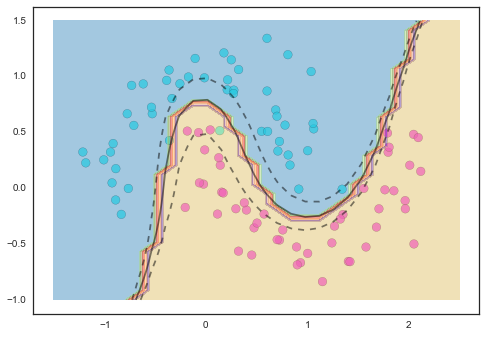

In [98]:
myplot(X, y, 3, w, margin=True, line_alpha=.5)